# Behavioral Cloning

This notebook is for preprocessing the data coming out of the Simulator

In [133]:
import pandas as pd
import numpy as np
import cv2
import pickle
from tqdm import tqdm_notebook as tqdm
from sklearn.utils import shuffle


import matplotlib
import matplotlib.pyplot as plt

% matplotlib inline

# Specify Training Directory

DIR = "./training_udacity/"

In [153]:
def load_raw_data(DIR, is_img_dir_abs=False):

    y_file = DIR+"driving_log.csv"
    
    if is_img_dir_abs:
        IMG_DIR = ""
    else:
        IMG_DIR = DIR
    
    data = pd.read_csv(y_file)
    data.columns = ['center', 'left', 'right', 'steering', 'throttle', 'brake', 'speed']
    
    print ("Number of Files: {}".format(len(data)))

    x_left = []
    x_center = []
    x_right = []
    y = []

    with tqdm(total=len(data)) as pbar:
        for i, row in tqdm(data.iterrows()):
            pbar.update(1)

            center_img = (row["center"])
            y.append(row["steering"])

            img = cv2.imread(IMG_DIR+row["center"].strip())   
            x_center.append(img[:,:,::-1])

            img = cv2.imread(IMG_DIR+row["left"].strip())
            x_left.append(img[:,:,::-1])

            img = cv2.imread(IMG_DIR+row["right"].strip())   
            x_right.append(img[:,:,::-1])
                                    
    x_left = np.asarray(x_left)
    x_center = np.asarray(x_center)
    x_right = np.asarray(x_right)
    y = np.asarray(y)
    
    print ("Number of Left Images: {}".format(len(x_left)))
    print ("Number of Center Images: {}".format(len(x_center)))
    print ("Number of Right Images: {}".format(len(x_right)))
    print ("Number of Labels: {}".format(len(y)))
    
    with open(DIR+"X_left.p", 'wb') as f:
        pickle.dump(x_left, f)
    
    with open(DIR+"X_center.p", 'wb') as f:
        pickle.dump(x_center, f)

    with open(DIR+"X_right.p", 'wb') as f:
        pickle.dump(x_right, f)

    with open(DIR+"y.p", 'wb') as f:
        pickle.dump(y, f )
    
load_raw_data(DIR, False)

Number of Files: 8036

Number of Left Images: 8036
Number of Center Images: 8036
Number of Right Images: 8036
Number of Labels: 8036


(8036, 160, 320, 3)


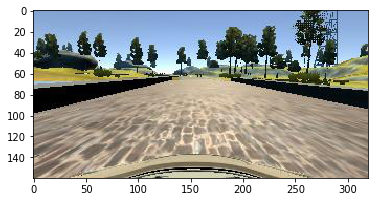

In [154]:
with open(DIR+"X_center.p", 'rb') as f:
    X = pickle.load(f)

print (X.shape)
plt.imshow(X[0,:])

(8036, 160, 320, 3) (8036, 160, 320, 3) (8036, 160, 320, 3) (8036,)
0.0


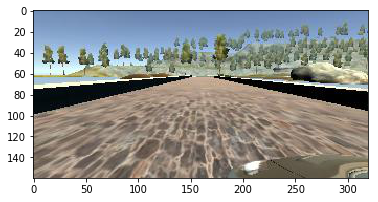

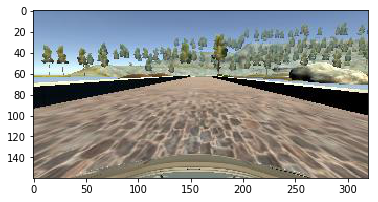

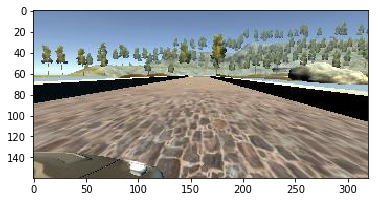

In [155]:
# Create Small dataset
with open(DIR+"X_left.p", 'rb') as f:
    x_left = pickle.load(f)

with open(DIR+"X_center.p", 'rb') as f:
    x_center = pickle.load(f)
    
with open(DIR+"X_right.p", 'rb') as f:
    x_right = pickle.load(f)

with open(DIR+"y.p", 'rb') as f:
    y = pickle.load(f)

ix = range(0, len(x_left))
x_left, index = shuffle(x_left, ix)
x_center = x_center[index]
x_right = x_right[index]
y = y[index]

print (x_left.shape, x_center.shape, x_right.shape, y.shape)
print(y[0])
plt.imshow(x_left[0,:])
plt.show()
plt.imshow(x_center[0,:])
plt.show()
plt.imshow(x_right[0,:])
plt.show()

# save first 200
L= 50
x_left_small = x_left[:L,]
x_center_small = x_center[:L,]
x_right_small = x_right[:L,]
y_small = y[:L,]

with open(DIR+"X_left_small.p", 'wb') as f:
    pickle.dump(x_left_small, f)

with open(DIR+"X_center_small.p", 'wb') as f:
    pickle.dump(x_center_small, f)

with open(DIR+"X_right_small.p", 'wb') as f:
    pickle.dump(x_right_small, f)

with open(DIR+"y_small.p", 'wb') as f:
    pickle.dump(y_small, f )

In [156]:
print (x_left_small.shape)
print (x_left.shape)

(50, 160, 320, 3)
(8036, 160, 320, 3)


(50, 160, 320, 3)


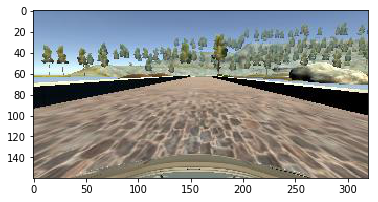

In [157]:
with open(DIR+"X_center_small.p", 'rb') as f:
    X = pickle.load(f)

print (X.shape)
plt.imshow(X[0,:])